In [ ]:
# https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/

In [16]:
import chardet
with open('james_training.xlsx', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': None, 'confidence': 0.0, 'language': None}

In [22]:
from pandas import read_csv
from matplotlib import pyplot
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

series = read_csv(r'new_james.txt', header=0, index_col=0,sep='\t')


In [23]:
series.head()

,Sales,Returns
Date,,
01.01.2012,5549,901
02.01.2012,4285,684
03.01.2012,3950,1534
04.01.2012,3996,1641
05.01.2012,4413,1151


In [32]:
series.shape

(366, 2)

<AxesSubplot:>

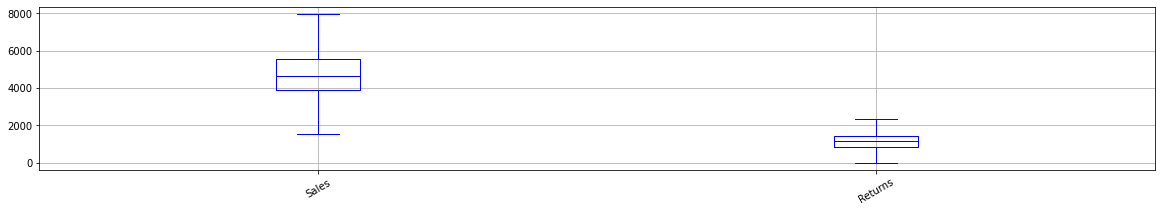

In [33]:
series.boxplot(grid='false', color='blue',fontsize=10, rot=30, showfliers=False )

In [28]:
df=series

In [38]:
Q1_return = df['Returns'].quantile(0.25)
Q3_return = df['Returns'].quantile(0.75)
IQR_return = Q3_return - Q1_return    #IQR is interquartile range. 

filter = (df['Returns'] >= Q1_return - 1.5 * IQR_return) & (df['Returns'] <= Q3 + 1.5 *IQR)
df.loc[filter]

,Sales,Returns
Date,,
01.01.2012,5549,901
02.01.2012,4285,684
03.01.2012,3950,1534
04.01.2012,3996,1641
05.01.2012,4413,1151
...,...,...
27.12.2012,5461,1115
28.12.2012,5391,1619
29.12.2012,6368,843


In [39]:
Q1_return

839.25

In [40]:
Q3_return


1440.75

In [31]:
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['Sales'] >= Q1 - 1.5 * IQR) & (df['Sales'] <= Q3 + 1.5 *IQR)
df.loc[filter]

,Sales,Returns
Date,,
01.01.2012,5549,901
02.01.2012,4285,684
03.01.2012,3950,1534
04.01.2012,3996,1641
05.01.2012,4413,1151
...,...,...
27.12.2012,5461,1115
28.12.2012,5391,1619
29.12.2012,6368,843


In [35]:
Q3

5538.5

In [36]:
Q1

3917.0

            Sales  Returns
Date                      
01.01.2012   5549      901
02.01.2012   4285      684
03.01.2012   3950     1534
04.01.2012   3996     1641
05.01.2012   4413     1151


<Figure size 1440x480 with 0 Axes>

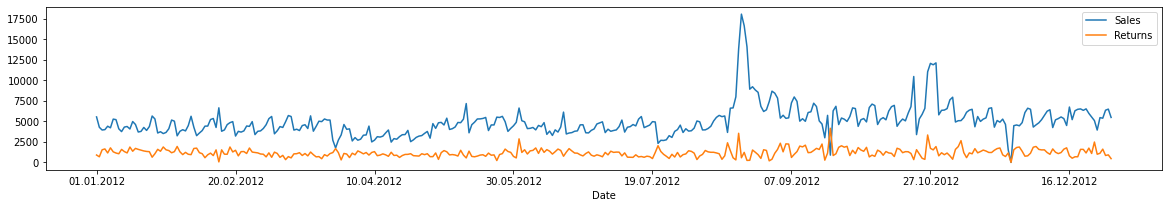

In [24]:

plt.rcParams["figure.figsize"] = (20,3)
print(series.head())
figure(figsize=(18, 6), dpi=80)
series.plot()
pyplot.show()

<AxesSubplot:>

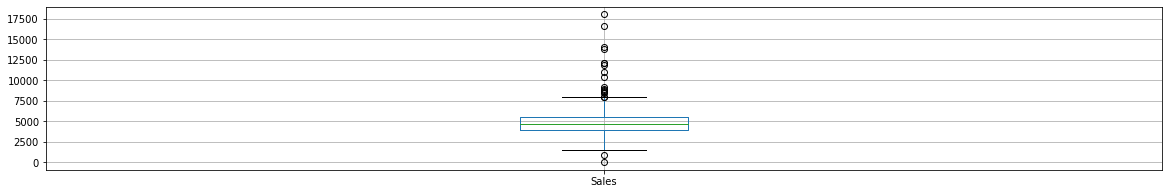

In [42]:
series.boxplot(column=['Sales'])

In [43]:
print(Q1)
print(Q3)

3917.0
5538.5


In [44]:
df2=df

In [78]:
df=df2

In [79]:
df = df[df['Sales'] < Q3]
df= df[df['Sales'] > Q1]

In [80]:
df.shape

(182, 2)

In [81]:
df = df[df['Returns'] < Q3_return]
df = df[df['Returns'] > Q1_return]

In [82]:
df.shape

(84, 2)

            Sales  Returns
Date                      
01.01.2012   5549      901
02.01.2012   4285      684
03.01.2012   3950     1534
04.01.2012   3996     1641
05.01.2012   4413     1151


<Figure size 1440x480 with 0 Axes>

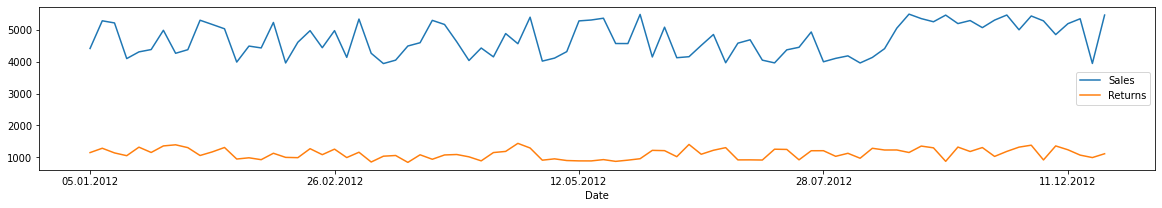

In [83]:

plt.rcParams["figure.figsize"] = (20,3)
print(series.head())
figure(figsize=(18, 6), dpi=80)
df.plot()
pyplot.show()

                  Sales      Returns
Date                                
05.01.2012          NaN          NaN
07.01.2012          NaN          NaN
08.01.2012  4969.333333  1193.000000
09.01.2012  4864.000000  1160.666667
11.01.2012  4539.333333  1172.000000
12.01.2012  4261.333333  1176.666667
14.01.2012  4557.000000  1278.666667
18.01.2012  4542.333333  1303.333333
20.01.2012  4541.000000  1353.666667
22.01.2012  4646.000000  1253.666667


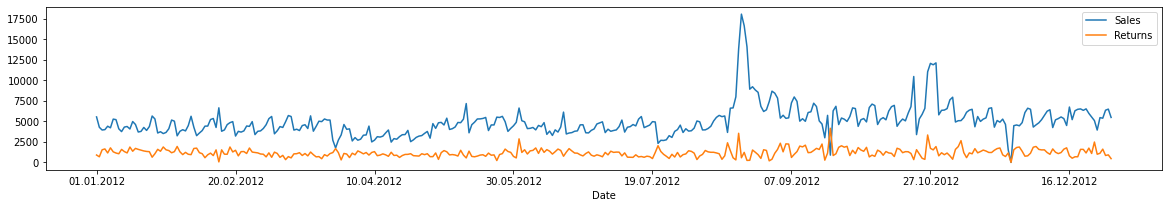

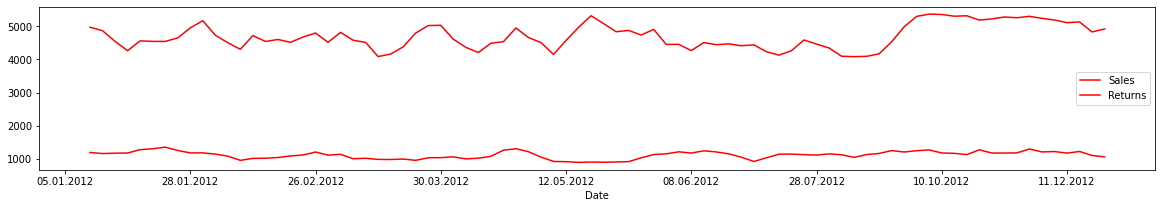

In [84]:
# Tail-rolling average transform
rolling = df.rolling(window=3)
rolling_mean = rolling.mean()
print(rolling_mean.head(10))
# plot original and transformed dataset
series.plot()
rolling_mean.plot(color='red')
pyplot.show()

In [85]:
## creating varibales
from pandas import read_csv
from pandas import DataFrame
from pandas import concat

df = DataFrame(df.values)


In [86]:
df.head()

,0,1
0,4413,1151
1,5281,1287
2,5214,1141
3,4097,1054
4,4307,1321


In [90]:
df_Sales= df[0]
df_Return=df[1]

In [102]:
lag2= df_Sales.shift(2)
lag2.head()

0       NaN
1       NaN
2    4413.0
3    5281.0
4    5214.0
Name: 0, dtype: float64

In [92]:
width = 3
lag1 = df_Sales.shift(1)
lag2= df_Sales.shift(2)
lag
lag3 = df_Sales.shift(width - 1)

In [93]:
window = lag3.rolling(window=width)

In [94]:
means = window.mean()

In [98]:
dataframe = concat([means, lag1,lag2, df_Sales], axis=1)

In [99]:
dataframe

,0,0,0,0
0,NaN,NaN,NaN,4413
1,NaN,4413.0,NaN,5281
2,NaN,5281.0,4413.0,5214
3,NaN,5214.0,5281.0,4097
4,4969.333333,4097.0,5214.0,4307
...,...,...,...,...
79,5297.666667,5279.0,5432.0,4849
80,5236.666667,4849.0,5279.0,5191
81,5186.666667,5191.0,4849.0,5345
82,5106.333333,5345.0,5191.0,3944


In [100]:
dataframe.columns = ['mean', 't-1', 't+1','t+2']

In [101]:
dataframe.head()

,mean,t-1,t+1,t+2
0,NaN,NaN,NaN,4413
1,NaN,4413.0,NaN,5281
2,NaN,5281.0,4413.0,5214
3,NaN,5214.0,5281.0,4097
4,4969.333333,4097.0,5214.0,4307


In [ ]:
width = 3
lag1 = df.shift(1)
lag2= df.shift(2)
lag3 = df.shift(width - 1)
window = lag3.rolling(window=width)
means = window.mean()
dataframe = concat([means, lag1,lag2, df], axis=1)
dataframe.columns = ['mean', 't-1', 't+1','t+2']
print(dataframe.head(10))

                  Sales      Returns
Date                                
01.01.2012          NaN          NaN
02.01.2012          NaN          NaN
03.01.2012  4594.666667  1039.666667
04.01.2012  4077.000000  1286.333333
05.01.2012  4119.666667  1442.000000
06.01.2012  4209.666667  1521.333333
07.01.2012  4638.000000  1403.333333
08.01.2012  4905.000000  1400.000000
09.01.2012  4864.000000  1160.666667
10.01.2012  4356.000000  1259.333333


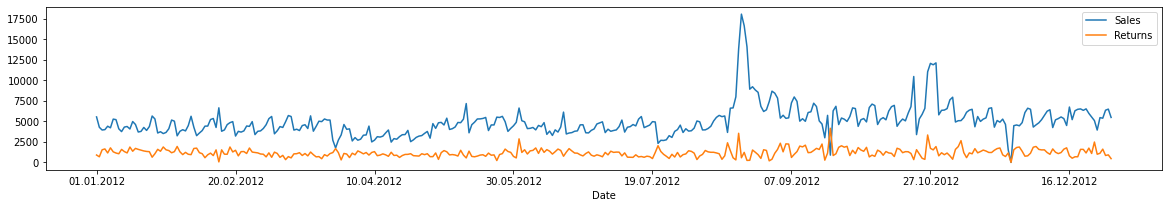

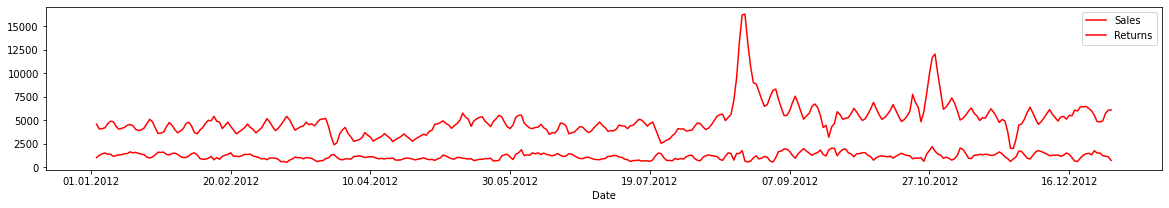

In [25]:

from pandas import read_csv
from matplotlib import pyplot
series =  read_csv(r'new_james.txt', header=0, index_col=0,sep='\t')
# Tail-rolling average transform
rolling = series.rolling(window=3)
rolling_mean = rolling.mean()
print(rolling_mean.head(10))
# plot original and transformed dataset
series.plot()
rolling_mean.plot(color='red')
pyplot.show()

## Moving Average as Feature Engineering

In [1]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
series = read_csv('daily-total-female-births-CA.csv', header=0, index_col=0)


In [2]:
df = DataFrame(series.values)
width = 3
lag1 = df.shift(1)
lag2= df.shift(2)
lag3 = df.shift(width - 1)
window = lag3.rolling(window=width)
means = window.mean()
dataframe = concat([means, lag1,lag2, df], axis=1)
dataframe.columns = ['mean', 't-1', 't+1','t+2']
print(dataframe.head(10))

        mean   t-1   t+1  t+2
0        NaN   NaN   NaN   35
1        NaN  35.0   NaN   32
2        NaN  32.0  35.0   30
3        NaN  30.0  32.0   31
4  32.333333  31.0  30.0   44
5  31.000000  44.0  31.0   29
6  35.000000  29.0  44.0   45
7  34.666667  45.0  29.0   43
8  39.333333  43.0  45.0   38
9  39.000000  38.0  43.0   27


In [3]:
######  https://machinelearningmastery.com/random-forest-for-time-series-forecasting/

In [4]:
## Random forest for time series prediction

In [5]:
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
 
# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols = list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    # put it all together
    agg = concat(cols, axis=1)
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg.values
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
    return data[:-n_test, :], data[-n_test:, :]
 
# fit an random forest model and make a one step prediction
def random_forest_forecast(train, testX):
    # transform list into array
    train = asarray(train)
    # split into input and output columns
    trainX, trainy = train[:, :-1], train[:, -1]
    # fit model
    model = RandomForestRegressor(n_estimators=10000)
    model.fit(trainX, trainy)
    # make a one-step prediction
    yhat = model.predict([testX])
    return yhat[0]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # split test row into input and output columns
        testX, testy = test[i, :-1], test[i, -1]
        # fit model on history and make a prediction
        yhat = random_forest_forecast(history, testX)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
        # summarize progress
        print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
    # estimate prediction error
    error = mean_absolute_error(test[:, -1], predictions)
    return error, test[:, -1], predictions


In [6]:
 
# load the dataset
series = read_csv('daily-total-female-births-CA.csv', header=0, index_col=0)
values = series.values


In [ ]:
# transform the time series data into supervised learning
data = series_to_supervised(values, n_in=3)

In [ ]:
data

In [ ]:
# evaluate
mae, y, yhat = walk_forward_validation(data, 12)
print('MAE: %.3f' % mae)
# plot expected vs predicted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()